Fitting sparse $s_0s$ sets to lower include lower $s_0s$ into the fit.
Fits always contain ten $s_0s$. We fitted the kinematic, cubic and quartic
weights for diferent sparse setups (take every second, every third, ... $s_0$).
We probe for $s_{min}<1GeV^2$.

In [5]:
exec(open('initNotebook.py').read())

# Load Data

In [6]:
weights = ['wCube', 'wKin', 'wQuart']
s0sMin = ['0.25', '0.475', '0.7', '0.925', '1.15', '1.375', '1.6', '1.95']

indexList = []
for weight in weights:
    for sMin in s0sMin:
        indexList.append(weight+sMin)


df = pd.read_csv('../../FESR/configurations/2019/sparseS0/fits.csv', header=1)
df.index = indexList
# exclude not converged fits
df = df[df['status']==0]
wKin = df[7:14]
wCube = df[0:7]
wQuart = df[14:21]
print(df.loc[: , ['chiDof', 'alpha']])

                 chiDof     alpha
wCube0.475   621.113598  0.251979
wCube0.7     101.318873  0.296483
wCube0.925     6.475990  0.317996
wCube1.15      6.237693  0.317627
wCube1.375     6.824519  0.316832
wCube1.6       6.738773  0.319508
wCube1.95      1.250837  0.326473
wKin0.475    221.543734  0.288498
wKin0.7       12.250365  0.321578
wKin0.925      9.707789  0.315771
wKin1.15       8.193081  0.316996
wKin1.375      5.109344  0.322636
wKin1.6        2.499764  0.328066
wKin1.95       1.127803  0.323164
wQuart0.475  580.765056  0.233311
wQuart0.7    519.107169  0.254503
wQuart0.925  102.070431  0.294491
wQuart1.15    14.057825  0.310799


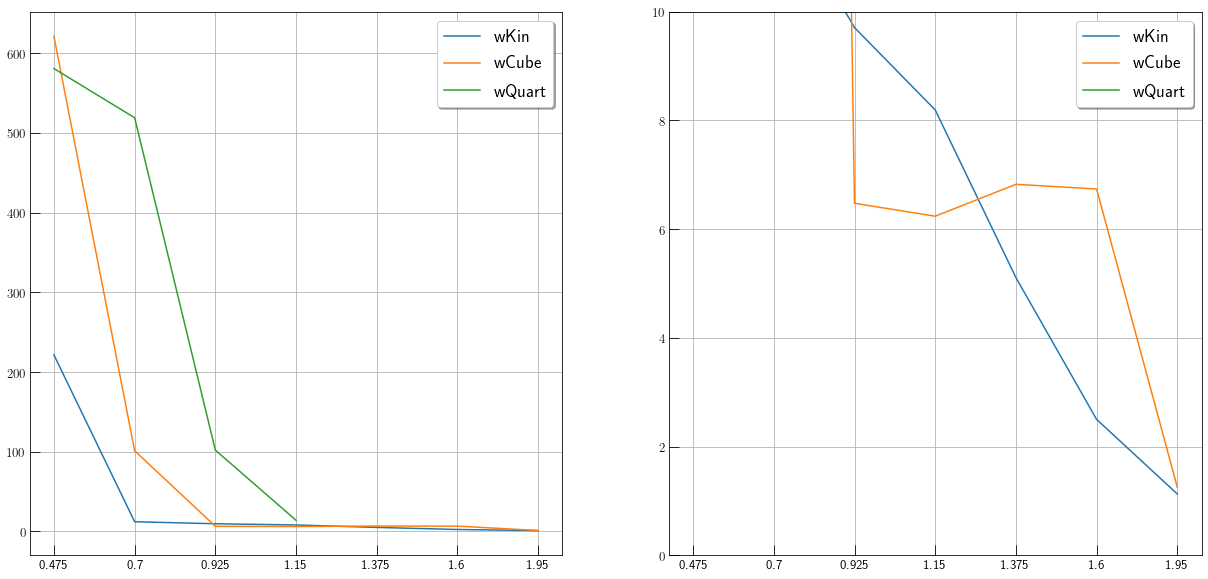

In [36]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(s0sMin[1:8], wKin['chiDof'], label='wKin')
axes[0].plot(s0sMin[1:8], wCube['chiDof'], label='wCube')
axes[0].plot(s0sMin[1:5], wQuart['chiDof'], label='wQuart')
axes[0].legend()

axes[1].plot(s0sMin[1:8], wKin['chiDof'], label='wKin')
axes[1].plot(s0sMin[1:8], wCube['chiDof'], label='wCube')
axes[1].plot(s0sMin[1:5], wQuart['chiDof'], label='wQuart')
axes[1].set_ylim(0, 10)
axes[1].legend()



We plotted the $\chi^2/dof$ for different $s__{min}$. The right plot is zoomed in. We note that for low $s_{min}$ ($s_0 < 1.15$) the $\chi^2/dof$ value is steep increasing. We also note that wQuart starts firtst to increase at $s_{min}=1.15$ followd by wCube at $s_{min}=0.925$ and finally wKin $s_{min}=0.7$. Consequently in "goodness of weight" wKin is the better weight, followd by WCube and finally wQuart. The $\chi^2/dof$ values are too high for almost all fits, but get better for higher $s_{min}$ values.

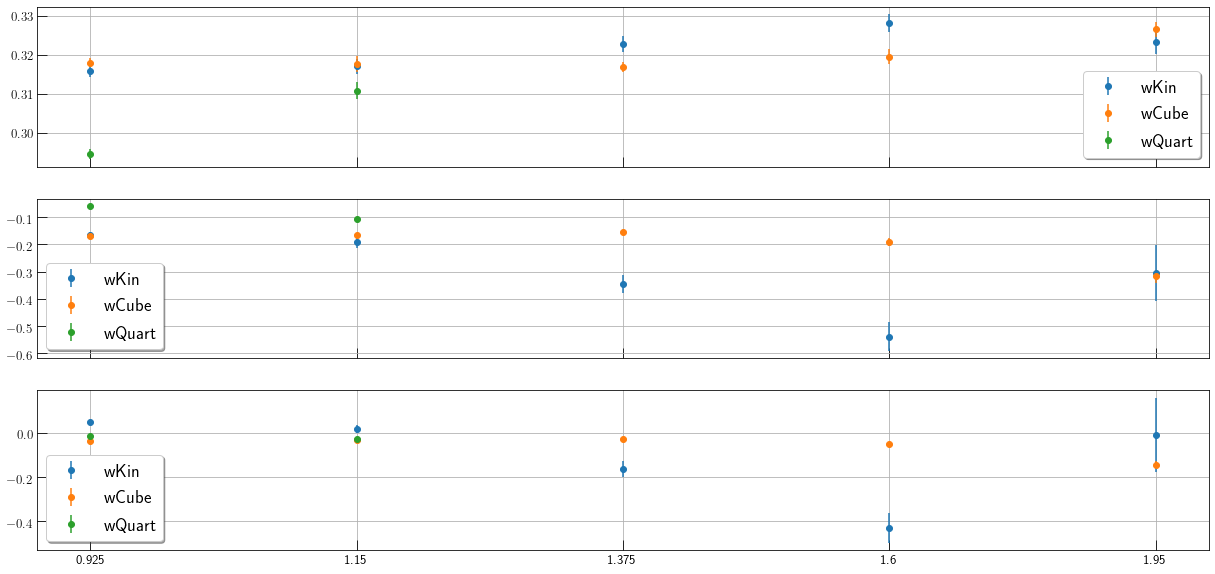

In [60]:
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].errorbar(s0sMin[3:8], wKin['alpha'][2:], yerr=wKin['alphaErr'][2:], label='wKin', linestyle='none', marker='o')
axes[0].errorbar(s0sMin[3:8], wCube['alpha'][2:], yerr=wCube['alphaErr'][2:], label='wCube', linestyle='none', marker='o')
axes[0].errorbar(s0sMin[3:5], wQuart['alpha'][2:], yerr=wQuart['alphaErr'][2:], label='wQuart', linestyle='none', marker='o')
axes[0].legend()

axes[1].errorbar(s0sMin[3:8], wKin['c6'][2:], yerr=wKin['c6Err'][2:], label='wKin', linestyle='none', marker='o')
axes[1].errorbar(s0sMin[3:8], wCube['c6'][2:], yerr=wCube['c6Err'][2:], label='wCube', linestyle='none', marker='o')
axes[1].errorbar(s0sMin[3:5], wQuart['c6'][2:], yerr=wQuart['c6Err'][2:], label='wQuart', linestyle='none', marker='o')
axes[1].legend()

axes[2].errorbar(s0sMin[3:8], wKin['c8'][2:], yerr=wKin['c8Err'][2:], label='wKin', linestyle='none', marker='o')
axes[2].errorbar(s0sMin[3:8], wCube['c8'][2:], yerr=wCube['c8Err'][2:], label='wCube', linestyle='none', marker='o')
axes[2].errorbar(s0sMin[3:5], wQuart['c8'][2:], yerr=wQuart['c8Err'][2:], label='wQuart', linestyle='none', marker='o')
axes[2].legend()

We plotted $\alpha_s$ for different sparse settings with each containing ten $s_0s$ moments for different weights, where the smalles $s_0$-value is given as x-tick label. We can see that the majority of $\alpha_s$ values is clustered in the interval of [0.315, 0.325]. The weights wKin and wCube show similar $\alpha_s$ values, whereas wQuart produces far smaller $\alpha_s$ values. Surprinsingly the wQuart fits only converged for lower $s_{min}$, which can be seen for the missing data points starting by $s_{min} = 1.375GeV^2$.